In [1]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

# There are two more essential techniques for applying deep learning to small datasets: 
- feature extraction with a pretrained network (which will get you to an accuracy of 90% to 96%) 
- fine-tuning a pretrained network (this will get you to a final accuracy of 97%)

According to: François Chollet, Deep Learning with Python,
Shelter Island, Manning Publications Co, 2018




# MNIST on example with different layers created by Collet



In [2]:
#creating a plain stack of layers
model = models.Sequential()
#applying Conv2D operation as a first layer with relu activation function
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#using max pooling peration with kernel size(2,2) on the first layer
model.add(layers.MaxPooling2D((2, 2)))
# applying Conv2D operaton on the second layer with relu activation function
model.add(layers.Conv2D( 64, (3, 3), activation='relu'))
# maxpooling with kernel size (2,2)
model.add(layers.MaxPooling2D((2, 2)))
# conv2D with relu activation function
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [3]:
#printing a string summary of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
# flattening the last layer of the model
model.add(layers.Flatten())
# using dense operation
model.add(layers.Dense(64, activation='relu'))
# using Dropout to avoid overfitting
model.add(layers.Dropout(0.5))
# using Dense operation with softmax activation function for the output layer
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
#getting the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [8]:
#reshaping and making the bounds of pixels within 0 to 1
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

# categorizing the dependent variables to have the 0-9 numbers as categories
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# as the model is created, we may config the model with losses and metrics with the compile method
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# training phase
history0 = model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 37s 8ms/step - loss: 0.2880 - accuracy: 0.9116
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0864 - accuracy: 0.9761
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0611 - accuracy: 0.9826
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0521 - accuracy: 0.9852
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0477 - accuracy: 0.9872


In [9]:
#getting the x_train shape 
print('Shape of the training data: ', x_train.shape)
#getting the x_test shape 
print('Shape of the test data: ', x_test.shape)

Shape of the training data:  (60000, 28, 28, 1)
Shape of the test data:  (10000, 28, 28, 1)


In [10]:
#getting the loss value & metrics values for the model in test mode
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0301 - accuracy: 0.9925


In [11]:
#test set accuracy
test_acc

0.9925000071525574

In [12]:
#loss of test set
test_loss

0.030112262815237045

# MNIST example with Collet layers

In [13]:
# This is very similar to the previous task, the difference is that the Mnist  is splitted to 3 datasets: train, val and test

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D( 64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
 model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]

x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/20
907/907 [==============================] - 10s 10ms/step - loss: 0.2578 - accuracy: 0.9212 - val_loss: 0.0357 - val_accuracy: 0.9930
Epoch 2/20
907/907 [==============================] - 8s 9ms/step - loss: 0.0765 - accuracy: 0.9787 - val_loss: 0.0326 - val_accuracy: 0.9940
Epoch 3/20
907/907 [==============================] - 8s 9ms/step - loss: 0.0553 - accuracy: 0.9845 - val_loss: 0.0368 - val_accuracy: 0.9935
Epoch 4/20
907/907 [==============================] - 8s 9ms/step - loss: 0.0500 - accuracy: 0.9869 - val_loss: 0.0344 - val_accuracy: 0.9945
Epoch 5/20
907/907 [==============================] - 8s 9ms/step - loss: 0.0460 - accuracy: 0.9876 - val_loss: 0.0338 - val_accuracy: 0.9950
Epoch 6/20
907/907 [==============================] - 8s 9ms/step - loss: 0.0476 - accuracy: 0.9878 - val_loss: 0.0390 - val_accuracy: 0.9945
Epoch 7/20
907/907 [==============================] - 8s 9ms/step - loss: 0.0487 - accuracy: 0.9880 - val_loss: 0.0301 - val_accuracy: 0.9960
Epoc

In [21]:
print('Shape of the training data: ', x_train.shape)
print('Shape of the test data: ', x_test.shape)

Shape of the training data:  (58000, 32, 32, 3)
Shape of the test data:  (10000, 32, 32, 3)


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0485 - accuracy: 0.9899


In [23]:
test_acc

0.9898999929428101

In [24]:
test_loss

0.04848494008183479

# VGG on MNIST

In [25]:
#loading the MNIST dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]

x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]


In [26]:
#using VGG16 as a transfer learning model
base_model = tf.keras.applications.VGG16(weights = 'imagenet', # Load weights pre-trained on ImageNet.
                                         include_top = False,  # Do not include the ImageNet classifier at the top
                                         input_shape = (32,32,3))

# train only the top layers (which were randomly initialized)
# freeze all convolutional VGG16 layers
for layer in base_model.layers:
  layer.trainable = False
base_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [27]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation = 'softmax')(x)
vgg16_model = Model(inputs = base_model.input, outputs = predictions)
vgg16_model.compile(optimizer='adam', 
                   loss=losses.sparse_categorical_crossentropy, 
                   metrics=['accuracy'])

In [28]:
vgg16_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [29]:
history = vgg16_model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
907/907 [==============================] - 33s 35ms/step - loss: 0.3877 - accuracy: 0.8726 - val_loss: 0.1736 - val_accuracy: 0.9465
Epoch 2/15
907/907 [==============================] - 31s 34ms/step - loss: 0.2440 - accuracy: 0.9203 - val_loss: 0.1025 - val_accuracy: 0.9700
Epoch 3/15
907/907 [==============================] - 31s 34ms/step - loss: 0.2191 - accuracy: 0.9290 - val_loss: 0.1092 - val_accuracy: 0.9695
Epoch 4/15
907/907 [==============================] - 31s 34ms/step - loss: 0.2024 - accuracy: 0.9349 - val_loss: 0.1028 - val_accuracy: 0.9675
Epoch 5/15
907/907 [==============================] - 31s 34ms/step - loss: 0.1940 - accuracy: 0.9380 - val_loss: 0.0862 - val_accuracy: 0.9745
Epoch 6/15
907/907 [==============================] - 31s 34ms/step - loss: 0.1843 - accuracy: 0.9405 - val_loss: 0.0887 - val_accuracy: 0.9780
Epoch 7/15
907/907 [==============================] - 31s 34ms/step - loss: 0.1790 - accuracy: 0.9426 - val_loss: 0.0765 - val_accuracy:

In [30]:
test_loss, test_acc = vgg16_model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 19ms/step - loss: 0.1106 - accuracy: 0.9653


In [31]:
test_acc

0.9653000235557556

In [32]:
test_loss

0.11055302619934082

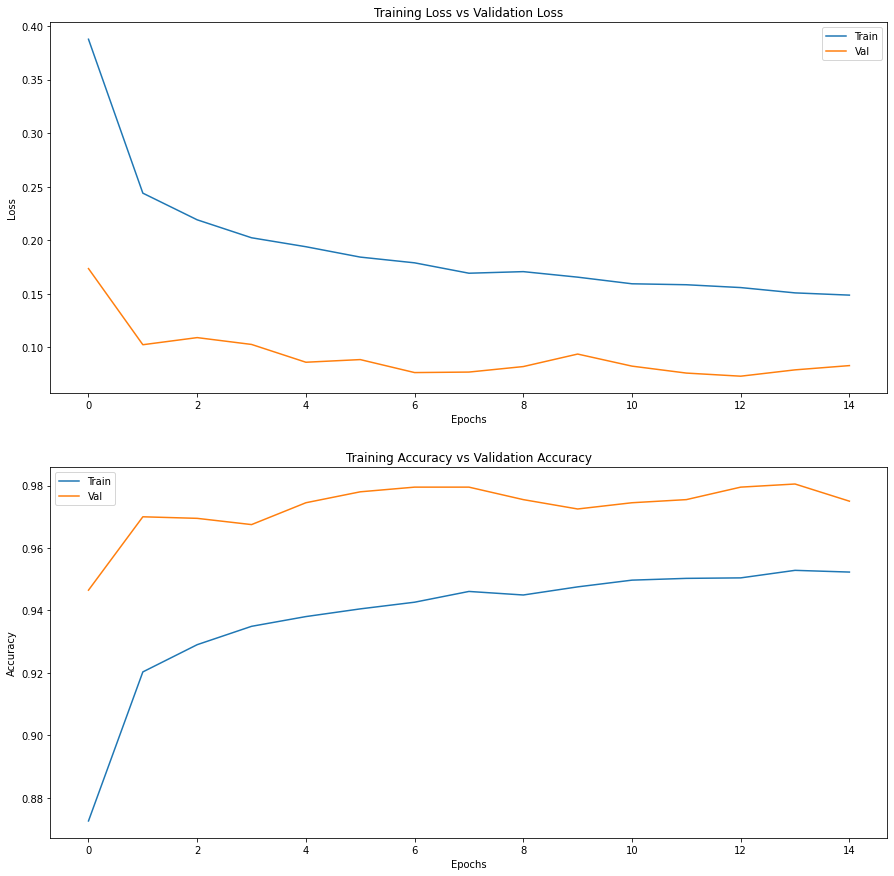

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

# Xception model

In [34]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

x_train = np.expand_dims(x_train, axis=-1)
x_train = tf.image.resize(x_train, [71,71]) # if we want to resize 
x_test = np.expand_dims(x_test, axis=-1)
x_test = tf.image.resize(x_test, [71,71]) # if we want to resize 

x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]


x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]


In [35]:
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(71, 71, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top


# train only the top layers (which were randomly initialized)
# freeze all convolutional Xception layers
for layer in base_model.layers:
  layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation = 'softmax')(x)
xception_model = Model(inputs = base_model.input, outputs = predictions)

xception_model.compile(optimizer='adam', 
                   loss=losses.sparse_categorical_crossentropy, 
                   metrics=['accuracy'])

print(xception_model.summary())


83689472/83683744 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 71, 71, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________

In [36]:
xception_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
907/907 [==============================] - 123s 132ms/step - loss: 0.8227 - accuracy: 0.7914 - val_loss: 0.2680 - val_accuracy: 0.9260
Epoch 2/10
907/907 [==============================] - 118s 130ms/step - loss: 0.4630 - accuracy: 0.8534 - val_loss: 0.2231 - val_accuracy: 0.9370
Epoch 3/10
907/907 [==============================] - 118s 130ms/step - loss: 0.4224 - accuracy: 0.8694 - val_loss: 0.1370 - val_accuracy: 0.9640
Epoch 4/10
907/907 [==============================] - 118s 130ms/step - loss: 0.3955 - accuracy: 0.8831 - val_loss: 0.1483 - val_accuracy: 0.9620
Epoch 5/10
907/907 [==============================] - 118s 130ms/step - loss: 0.3763 - accuracy: 0.8889 - val_loss: 0.1348 - val_accuracy: 0.9630
Epoch 6/10
907/907 [==============================] - 118s 130ms/step - loss: 0.3786 - accuracy: 0.8857 - val_loss: 0.1761 - val_accuracy: 0.9570
Epoch 7/10
907/907 [==============================] - 118s 130ms/step - loss: 0.3758 - accuracy: 0.8885 - val_loss: 0.1444 -

In [37]:
print(base_model.summary())


Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 71, 71, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [38]:
test_loss, test_acc = xception_model.evaluate(x_test, y_test)

313/313 [==============================] - 18s 55ms/step - loss: 0.1705 - accuracy: 0.9587


In [39]:
test_loss

0.1705203354358673

In [40]:
test_acc

0.9587000012397766

# Below are the test loss and test accuracies of each model used

<table ><tr><th>Model name</th><th>Test Loss</th><th>Test Accuracy</th></tr>

<tr ><td><span >CNN model</span></td><td>0.03011</td><td>0.99250
</td></tr>

<tr ><td><span >CNN model with one_hot_encoding</span></td><td>0.04848</td><td>0.98989</td></tr>

<tr ><td><span >VGG16</span></td><td>0.11055</td><td>0.96530</td></tr>

<tr ><td><span >Xception</span></td><td>0.17052</td><td>0.95870</td></tr>

#References 

François Chollet, Deep Learning with Python,
Shelter Island, Manning Publications Co, 2018 \
https://keras.io/api/applications/  \
https://www.analyticsvidhya.com/blog/2017/06/transfer-learning-the-art-of-fine-tuning-a-pre-trained-model/  \
https://keras.io/api/applications/vgg/#vgg16-function  \
https://keras.io/api/applications/xception/
